In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahraahmadnezhad","key":"1633e0b95ee5afc39d39dead2724c52d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 35.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [6]:
!unzip \*.zip  && rm *.zip

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [7]:
#Read Dataset 
mpc_train_data = pd.read_csv('/content/files/train.csv')
mpc_test_data = pd.read_csv('/content/files/test.csv')

In [8]:
mpc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [34]:
mpc_train_data.shape

(2000, 21)

In [35]:
mpc_test_data.shape

(1000, 21)

In [9]:
mpc_train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# first 5 rows of the data
mpc_train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
# Unique Values in each column
mpc_train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
mpc_test_data.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [13]:
# train
x = mpc_train_data.iloc[:,0:20]  
y = mpc_train_data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
#spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4)

In [15]:
#Normalizing the data 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train = pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns = x_test.columns)

In [16]:
x_train.shape

(1500, 20)

In [17]:
from copy import deepcopy

In [18]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

select_feature = []
all_feature = set(x.columns)

for k in range(5):
  kth_auc = 0
  kth_feature = None
  for f in (all_feature - set(select_feature)):
    tmp_feature = deepcopy(select_feature)
    tmp_feature.append(f)
    model = LogisticRegression().fit(x_train[tmp_feature], y_train)
    y_pred = model.predict(x_test[tmp_feature])
    auc = metrics.accuracy_score(y_test, y_pred)
    if kth_auc < auc:
      kth_auc = auc
      kth_feature = f
  select_feature.append(f)

In [19]:
print(select_feature)

['ram', 'sc_h', 'battery_power', 'touch_screen', 'dual_sim']


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       117
           1       0.77      0.76      0.76       120
           2       0.81      0.79      0.80       138
           3       0.89      0.94      0.91       125

    accuracy                           0.84       500
   macro avg       0.84      0.85      0.84       500
weighted avg       0.84      0.84      0.84       500



In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(select_feature))
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [22]:
print(pca.components_)

[[ 0.07534123 -0.01070618  0.05626635 -0.03415454  0.493063   -0.3452506
  -0.00660043  0.0393065   0.06468929  0.0050088   0.49148019 -0.16069754
  -0.13725914 -0.03341401 -0.3103313  -0.33892289  0.06756885 -0.33745777
  -0.02420748 -0.06505839]
 [ 0.09333053 -0.05734717 -0.04916688 -0.04990543  0.48376185  0.35861353
  -0.03093166  0.03668398  0.0056039  -0.02609785  0.48710582  0.20942636
   0.23294718  0.08787333  0.24109133  0.2540299   0.00142297  0.38072718
  -0.01931329  0.07966541]
 [-0.00969292 -0.06945819  0.02828939 -0.01111226 -0.01498711 -0.43634162
  -0.00378534 -0.01651634 -0.01217374  0.08771507 -0.00662824  0.50717479
   0.50095897 -0.03153945  0.23274909  0.18141312  0.08006293 -0.42614502
   0.03251955  0.10017533]
 [ 0.05414619 -0.08895308 -0.05040477 -0.00960454 -0.10674535  0.20731993
  -0.08521237  0.09292297  0.07904895 -0.08177937 -0.07586185  0.38533803
   0.39297504 -0.06057078 -0.52577601 -0.51252482  0.03685197  0.21608226
   0.0592279   0.01719938]
 [ 0.

In [23]:
model = LogisticRegression().fit(pca_x_train, y_train)
y_pred = model.predict(pca_x_test)

In [24]:
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.27      0.44      0.34       117
           1       0.25      0.23      0.24       120
           2       0.32      0.16      0.21       138
           3       0.31      0.34      0.33       125

    accuracy                           0.29       500
   macro avg       0.29      0.29      0.28       500
weighted avg       0.29      0.29      0.28       500



# Bin

In [ ]:
#Read Dataset 
mpc_train_data = pd.read_csv('/content/files/train.csv')

In [ ]:
# train
x = mpc_train_data.iloc[:,0:20]  
y = mpc_train_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
#spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4)

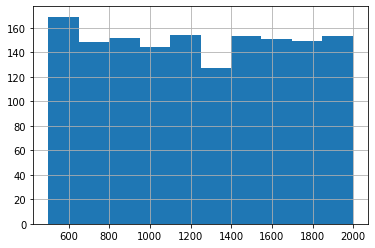

In [ ]:
x_train.battery_power.hist()

In [ ]:
min_value = x_train['battery_power'].min() 
max_value = x_train['battery_power'].max() 
print('min:', min_value, ', max:', max_value)
bins = np.linspace(min_value,max_value,4) 
print(bins)

min: 501 , max: 1998
[ 501. 1000. 1499. 1998.]


In [ ]:
x_train['battery_power'] = pd.cut(x_train['battery_power'], bins=bins)

In [ ]:
x_train['battery_power'].value_counts()

(501.0, 1000.0]     513
(1499.0, 1998.0]    503
(1000.0, 1499.0]    483
Name: battery_power, dtype: int64

#decision tree



In [41]:
DTC = DecisionTreeClassifier(random_state = 42)

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()

crDTC

,precision,recall,f1-score,support
0,0.896552,0.888889,0.892704,117.000
1,0.736842,0.816667,0.774704,120.000
2,0.830645,0.746377,0.786260,138.000
3,0.889764,0.904000,0.896825,125.000
accuracy,0.836000,0.836000,0.836000,0.836
macro avg,0.838451,0.838983,0.837623,500.000
weighted avg,0.838334,0.836000,0.836036,500.000


In [42]:
dtree.score(x_test,y_test)

0.818